In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



df_API_cyber = pd.read_csv(r"C:/Users/Luca/Aug20_Ditchley/data/processed/cyber_tweets_12082020.csv")
df_twint_cyber = pd.read_csv(r"C:/Users/Luca/Aug20_Ditchley/data/processed/twint_cyber_16082020_inParallel_with_index.csv")

In [3]:
result_API = df_API_cyber.groupby('screen_name')['tweet_id'].nunique()

In [12]:
df_API_cyber.head()

,Unnamed: 0,user_id,name,screen_name,location,user_description,user_friends_n,user_followers_n,listed_count,prof_created_at,...,retweet_count,favourite_count,hashtags,mentions,source_device,retweeted,retweet_text,quote_text,quote_screen_name,Indexes
0,0,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,10,0,[],"[{'screen_name': 'pwonacott', 'name': 'Peter W...",Twitter for iPhone,False,Behind the Beirut Explosion: Seven Years of Of...,None,None,-1
1,1,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,5050,0,[],"[{'screen_name': 'WSJ', 'name': 'The Wall Stre...",Twitter for iPhone,False,The Bill &amp; Melinda Gates Foundation said i...,None,None,-1
2,2,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,0,0,[],"[{'screen_name': 'dnvolz', 'name': 'Dustin Vol...",Twitter for iPhone,False,None,None,None,0
3,3,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,1,0,[],"[{'screen_name': 'margheritamvs', 'name': 'Mar...",Twitter for iPhone,False,"A heartbreaking tale, beautifully told by @Abi...",None,None,-1
4,4,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,474,0,[],"[{'screen_name': 'Kate_OKeeffe', 'name': ""Kate...",Twitter for iPhone,False,The Trump administration just recommended a pl...,None,None,-1


In [4]:
result_API 

screen_name
Ad_Nauseum74       274
JesscaHaworth      565
LeoKelion         3237
MsHannahMurphy    3186
SCFGallagher      3226
SophiaFurber      3211
_lucyingham        434
dannsimmons       2237
dannyjpalmer      3218
gordoncorera      1781
jennystrasburg    3228
joetidy           3245
Name: tweet_id, dtype: int64

In [ ]:
np.sum(df.count())

In [24]:
df_API_cyber.groupby('screen_name')['retweet_text'].count()

screen_name
Ad_Nauseum74       274
JesscaHaworth      565
LeoKelion         3237
MsHannahMurphy    3186
SCFGallagher      3226
SophiaFurber      3211
_lucyingham        434
dannsimmons       2237
dannyjpalmer      3218
gordoncorera      1781
jennystrasburg    3228
joetidy           3245
Name: retweet_text, dtype: int64

In [14]:
df_API_cyber["Indexes"]= df_API_cyber['retweet_text'].str.find('None')
#sum_RT = df_API_cyber.count(df_API_cyber["Indexes"] == 0)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [37]:
np.count_nonzero(df_API_cyber["Indexes"]==0)

21359

In [36]:
df_API_cyber[df_API_cyber["Indexes"]==0].retweet_text.str.count("None").sum()

21360

In [42]:
for name in df_API_cyber['screen_name'].unique():
    subset = df_API_cyber.groupby('screen_name')['retweet_text']
    #df_API_cyber.groupby('screen_name')['retweet_text'].str.count("None").sum()

KeyError: 'Columns not found: False, True'

In [126]:
tweets_n = pd.DataFrame(columns = ['name','n_tweets','RT_n'])
tweets_n.name = df_API_cyber['screen_name'].unique()
tn = []
RT = []
for name in tweets_n.name.unique():
    mask = (df_API_cyber['screen_name'] ==  name)
    df_API_cyber_subset = df_API_cyber.loc[mask]
    tweets_n_temp = (df_API_cyber_subset.retweet_text.str.count("None").sum())
    tot = df_API_cyber_subset['retweet_text'].count()
    tn.append(tweets_n_temp)
    RT.append(tot - tweets_n_temp)
tweets_n['n_tweets'] = tn   
tweets_n['RT_n'] = RT 
tweets_n['RT %'] = (tweets_n.RT_n*100)/(tweets_n.n_tweets+tweets_n.RT_n)

In [127]:
tweets_n

,name,n_tweets,RT_n,RT %
0,jennystrasburg,1633,1595,49.411400
1,dannsimmons,2046,191,8.538221
2,LeoKelion,2876,361,11.152302
3,gordoncorera,1533,248,13.924761
4,joetidy,2403,842,25.947612
5,_lucyingham,382,52,11.981567
6,dannyjpalmer,3024,194,6.028589
7,SophiaFurber,2495,716,22.298349
8,SCFGallagher,2943,283,8.772474
9,MsHannahMurphy,1538,1648,51.726303


Text(0.5, 0, 'Cyber Journalists')

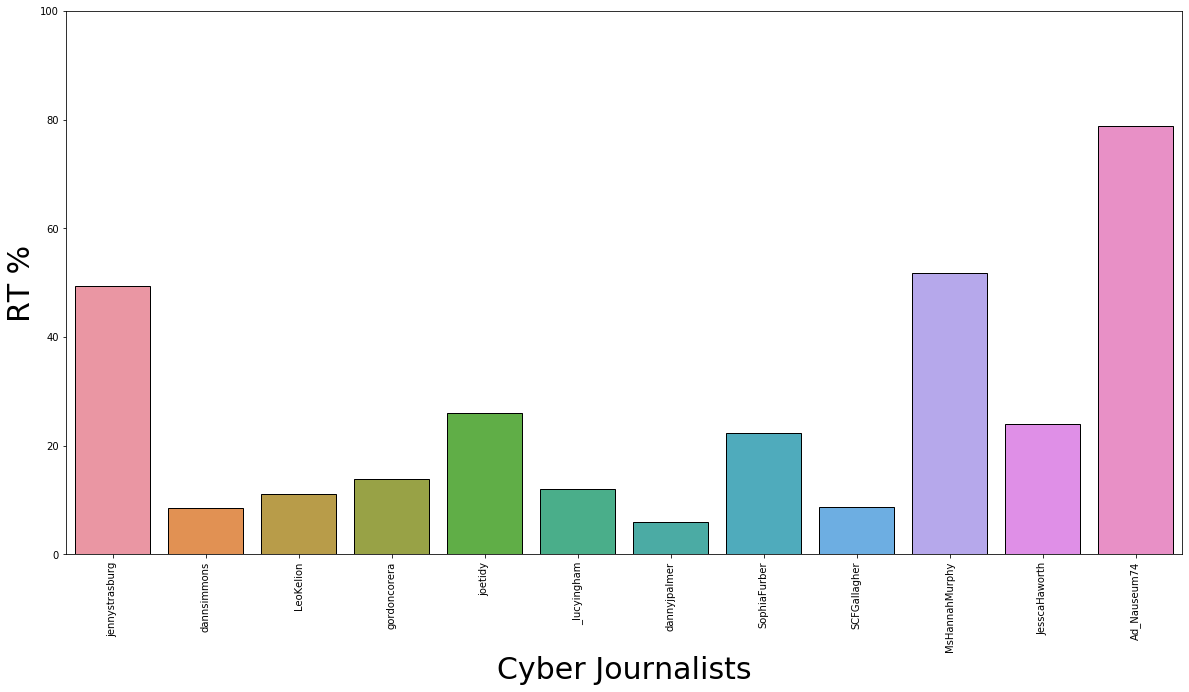

In [130]:
fig, axes = plt.subplots(figsize=(20,10))
chart1 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT %'],edgecolor="k")
#chart2 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT_n'], ax=axes[1],edgecolor="k")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
#chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
#chart1.set_ylim([0, 3100])
chart1.set_ylim([0, 100])
chart1.set_ylabel('RT %',fontsize=30)
#chart2.set_ylabel('N RT',fontsize=30)
chart1.set_xlabel('Cyber Journalists',fontsize=30)
#chart2.set_xlabel('Education Journalists',fontsize=30)

In [45]:
df_API_cyber_subset.tail()

,Unnamed: 0,user_id,name,screen_name,location,user_description,user_friends_n,user_followers_n,listed_count,prof_created_at,...,retweet_count,favourite_count,hashtags,mentions,source_device,retweeted,retweet_text,quote_text,quote_screen_name,Indexes
3223,3223,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,0,0,[],"[{'screen_name': 'WSJ', 'name': 'The Wall Stre...",Twitter Web Client,False,None,None,None,0
3224,3224,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,25,0,[],"[{'screen_name': 'michaelsiconolf', 'name': 'm...",Twitter for iPhone,False,TRACKING THE STORMY DANIELS MONEY TRAIL: aweso...,None,None,-1
3225,3225,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,15,0,[],"[{'screen_name': 'michaelsiconolf', 'name': 'm...",Twitter for iPhone,False,WHAT HAPPENED TO ‘YOU’RE FIRED’? Trump didn’t ...,None,None,-1
3226,3226,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,0,1,[],"[{'screen_name': 'kimseverson', 'name': 'Kim S...",Twitter for iPhone,False,None,None,None,0
3227,3227,244169661,jenny strasburg,jennystrasburg,London,WSJ reporter/New Mexican in London. Cyber(crim...,2843,5557,199,2011-01-28 17:33:33,...,17,0,[],"[{'screen_name': 'michaelsiconolf', 'name': 'm...",Twitter for iPhone,False,"""The SEC shouldn’t be making it easier for exe...",None,None,-1


In [59]:
tn

[1633, 2046, 2876, 1533, 2403, 382, 3024, 2495, 2943, 1538, 429, 58]

In [107]:
tweets_n

,name,n_tweets,RT_n
0,jennystrasburg,1633,1595
1,dannsimmons,2046,191
2,LeoKelion,2876,361
3,gordoncorera,1533,248
4,joetidy,2403,842
5,_lucyingham,382,52
6,dannyjpalmer,3024,194
7,SophiaFurber,2495,716
8,SCFGallagher,2943,283
9,MsHannahMurphy,1538,1648


Text(0.5, 0, 'Cyber Journalists')

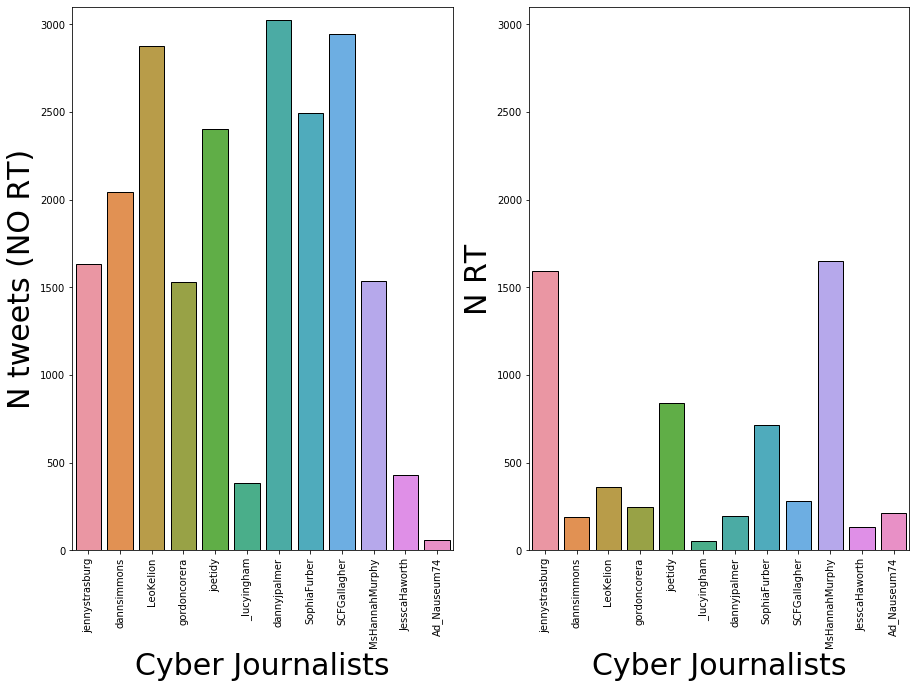

In [108]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
chart1 = sns.barplot(x = tweets_n['name'],y = tweets_n['n_tweets'], ax=axes[0],edgecolor="k")
chart2 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT_n'], ax=axes[1],edgecolor="k")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart1.set_ylim([0, 3100])
chart2.set_ylim([0, 3100])
chart1.set_ylabel('N tweets (NO RT)',fontsize=30)
chart2.set_ylabel('N RT',fontsize=30)
chart1.set_xlabel('Cyber Journalists',fontsize=30)
chart2.set_xlabel('Cyber Journalists',fontsize=30)

In [135]:
df_API_cyber = pd.read_csv(r"C:/Users/Luca/Aug20_Ditchley/data/processed/API_education_17082020.csv")
df_twint_cyber = pd.read_csv(r"C:/Users/Luca/Aug20_Ditchley/data/processed/twint_education_16082020_inParallel_with_index.csv")

In [136]:
tweets_n = pd.DataFrame(columns = ['name','n_tweets','RT_n'])
tweets_n.name = df_API_cyber['screen_name'].unique()
tn = []
RT = []
for name in tweets_n.name.unique():
    mask = (df_API_cyber['screen_name'] ==  name)
    df_API_cyber_subset = df_API_cyber.loc[mask]
    tweets_n_temp = (df_API_cyber_subset.retweet_text.str.count("None").sum())
    tot = df_API_cyber_subset['retweet_text'].count()
    tn.append(tweets_n_temp)
    RT.append(tot - tweets_n_temp)
tweets_n['n_tweets'] = tn   
tweets_n['RT_n'] = RT 

Text(0.5, 0, 'Education Journalists')

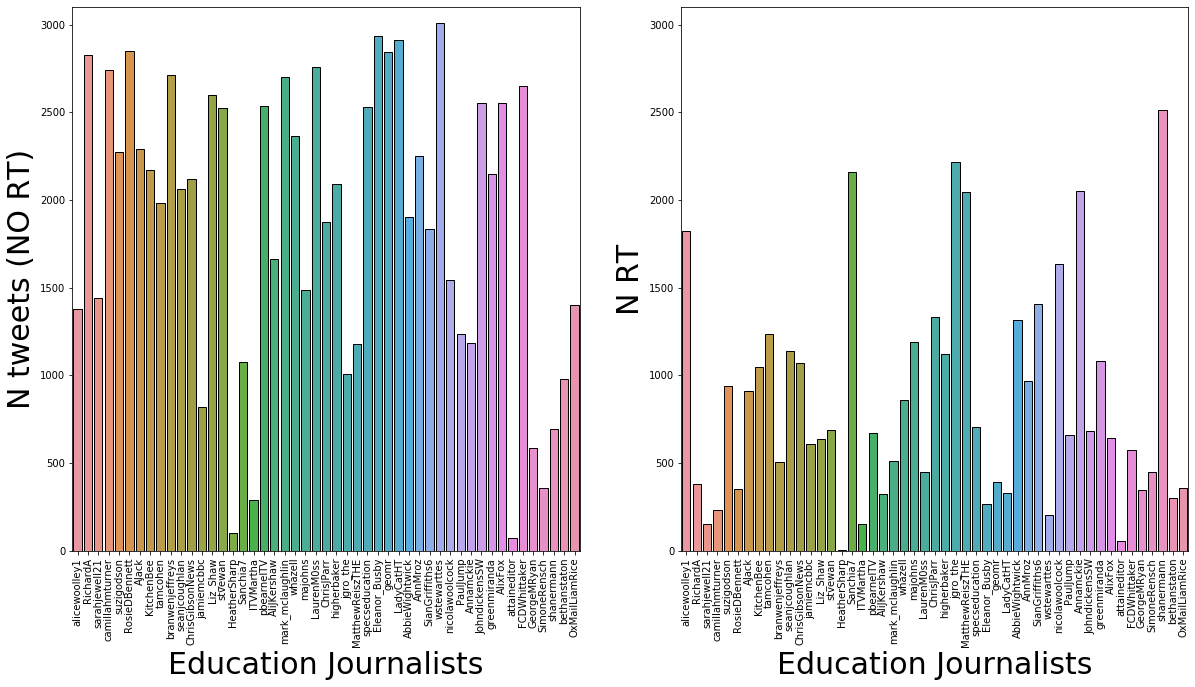

In [111]:
fig, axes = plt.subplots(1,2,figsize=(20,10))
chart1 = sns.barplot(x = tweets_n['name'],y = tweets_n['n_tweets'], ax=axes[0],edgecolor="k")
chart2 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT_n'], ax=axes[1],edgecolor="k")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
chart1.set_ylim([0, 3100])
chart2.set_ylim([0, 3100])
chart1.set_ylabel('N tweets (NO RT)',fontsize=30)
chart2.set_ylabel('N RT',fontsize=30)
chart1.set_xlabel('Education Journalists',fontsize=30)
chart2.set_xlabel('Education Journalists',fontsize=30)

In [116]:
(tweets_n.RT_n[0]*100)/(tweets_n.n_tweets[0]+tweets_n.RT_n[0])

56.91107644305772

In [138]:
tweets_n['RT %'] = (tweets_n.RT_n*100)/(tweets_n.n_tweets+tweets_n.RT_n)
#for n in tweets_n:
    #tweets_n['RT %'] = (tweets_n.RT_n[n]*100)/(tweets_n.n_tweets[n]+tweets_n.RT_n[n])
    

In [140]:
import math
tweets_n['RT %'].mean()

31.068389591702452

Text(0.5, 36.19999999999999, 'Education Journalists')

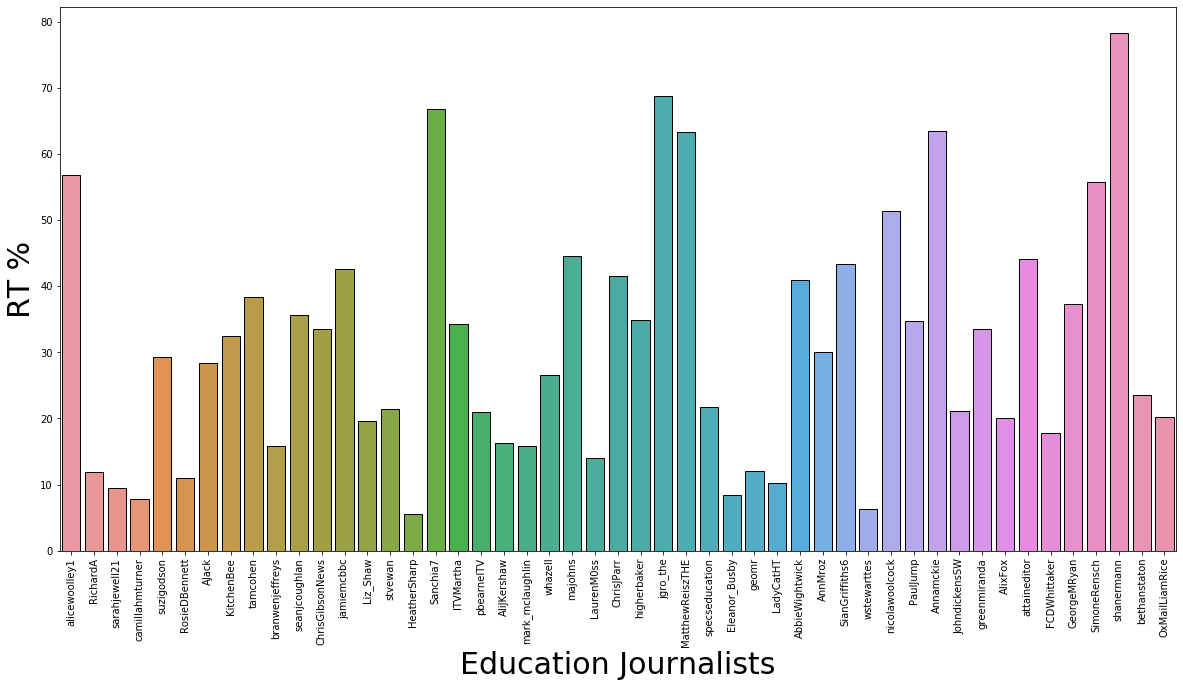

In [122]:
fig, axes = plt.subplots(figsize=(20,10))
chart1 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT %'],edgecolor="k")
#chart2 = sns.barplot(x = tweets_n['name'],y = tweets_n['RT_n'], ax=axes[1],edgecolor="k")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
#chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
#chart1.set_ylim([0, 3100])
#chart2.set_ylim([0, 3100])
chart1.set_ylabel('RT %',fontsize=30)
#chart2.set_ylabel('N RT',fontsize=30)
chart1.set_xlabel('Education Journalists',fontsize=30)
chart2.set_xlabel('Education Journalists',fontsize=30)